<a href="https://colab.research.google.com/github/kiran-m-kannur/Salary-prediction/blob/main/Salary_Prediciton_(Comparision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv("/content/adult.data.csv", header=None, sep=',\s', na_values=["?"])
dataset.columns = ['Age','Work Class', 'Final Weight', 'Education', 'Experience','Marital Status', 'Occupation',"Relationship", 'Race','Gender','Capital Gain','Capital Loss','Work hours/Week','Country of Origin','Income']

In [ ]:
dataset.head(5)

,Age,Work Class,Final Weight,Education,Experience,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Work hours/Week,Country of Origin,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Since we are intrested in the realtion between all these factors and annual income, we do comparison to see how the annual income varies with each variable

In [ ]:
dataset.Income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: Income, dtype: float64

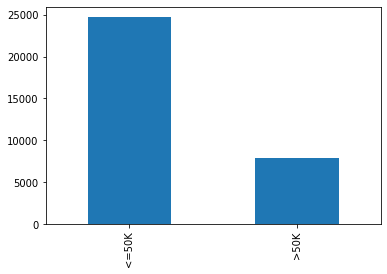

In [ ]:
# Number of people with above $50k and below a year
dataset.Income.value_counts().plot(kind='bar')
plt.show()

In [ ]:
#Describing all the categorical data
cat_data = [x for x in dataset.columns if dataset[x].dtype =="object"]
cat_data

['Work Class',
 'Education',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Country of Origin',
 'Income']

In [ ]:
#describing all the numerical data
num_data = [x for x in dataset.columns if dataset[x].dtype == "int"]
num_data

['Age',
 'Final Weight',
 'Experience',
 'Capital Gain',
 'Capital Loss',
 'Work hours/Week']

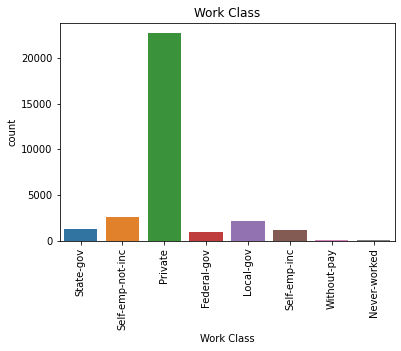

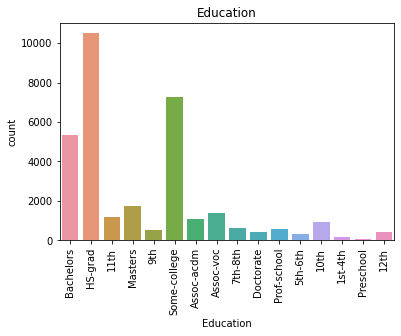

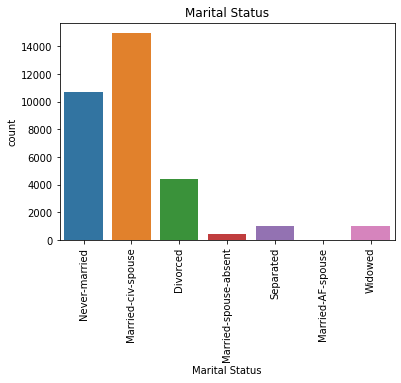

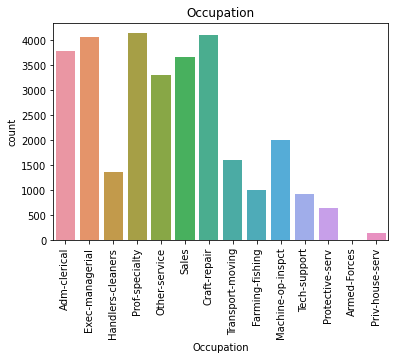

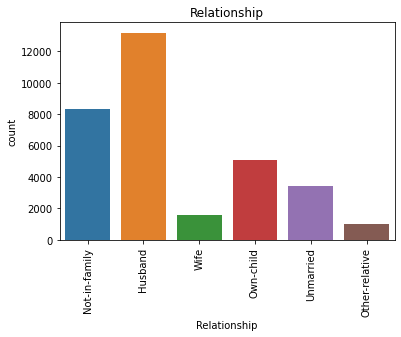

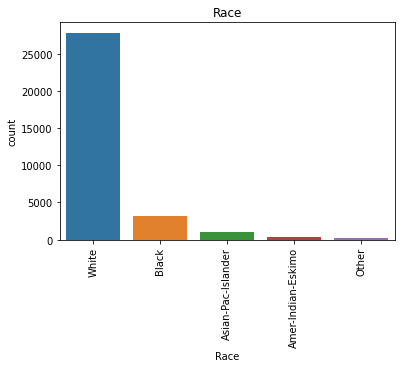

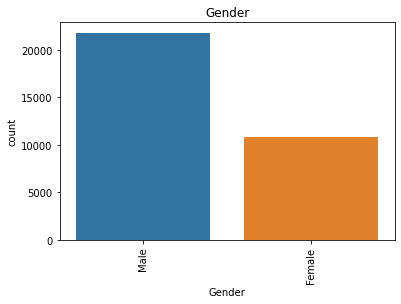

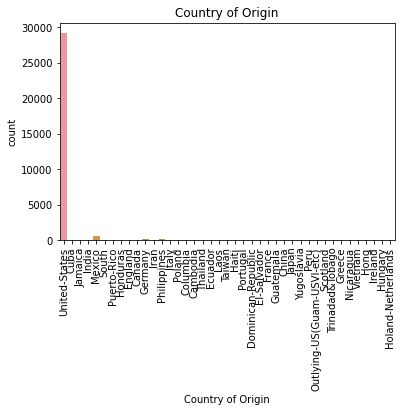

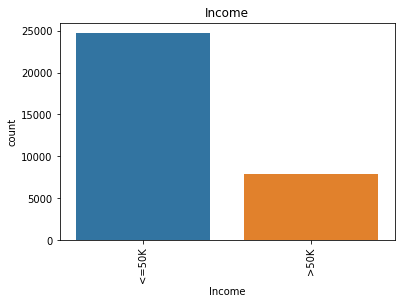

In [ ]:
# Relationship between each categorical data and how many times the data has been repeated
for i in cat_data:
  plt.title(i)
  sns.countplot(x=dataset[i])
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
#Function to distinguish between age groups instead of taking all ages into consideration 
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return ">70"

dataset['Age group'] = dataset['Age'].apply(age_group)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

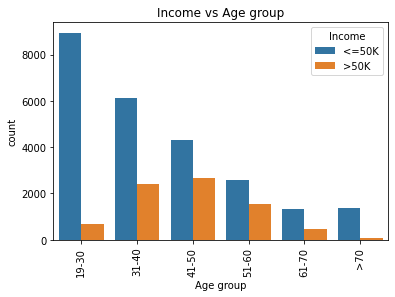

In [ ]:
#Relation between Income and Age group
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', '>70']
sns.countplot(dataset['Age group'], hue = dataset['Income'], order = order_list)
plt.title("Income vs Age group")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

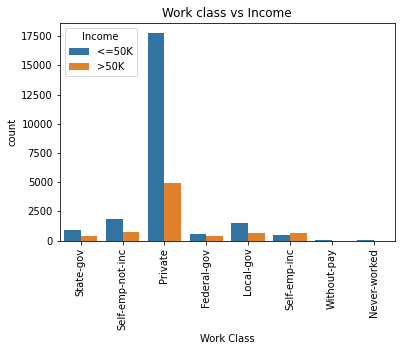

In [ ]:
#Relation between the different class and income
sns.countplot(dataset['Work Class'], hue = dataset['Income'])
plt.title("Work class vs Income")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

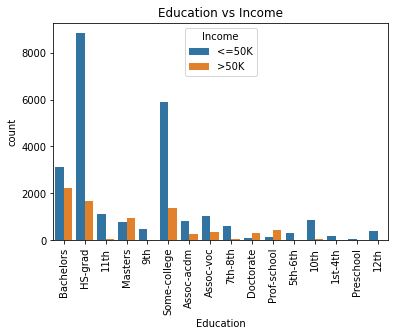

In [ ]:
#Relation between the education level and income
sns.countplot(dataset['Education'], hue = dataset['Income'])
plt.title("Education vs Income")
plt.xticks(rotation=90)

In [ ]:
#Relation between the person's ecperience and income
sns.countplot(dataset['Experience'], hue = dataset['Income'])
plt.title("Experience vs Income")
plt.xticks(rotation=90) 

In [ ]:
#Relation between the person Martial status and Income
sns.countplot(dataset['Marital Status'], hue = dataset['Income'])
plt.title("Marital Status vs Income")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

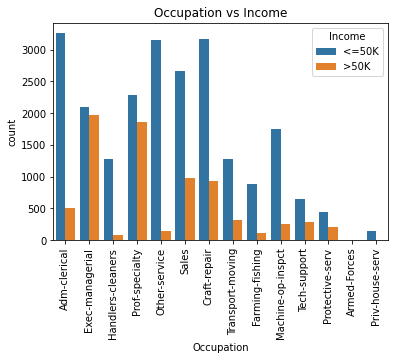

In [ ]:
#relation betweeen Occupation vs Income
sns.countplot(dataset['Occupation'], hue = dataset['Income'])
plt.title("Occupation vs Income")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

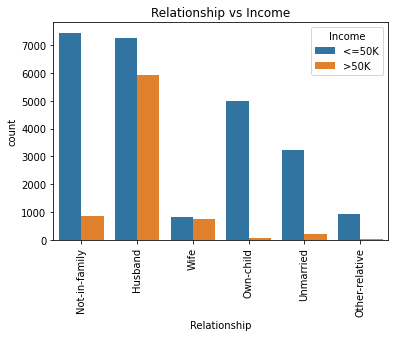

In [ ]:
#relationsjip between the person's relationship and their income
sns.countplot(dataset['Relationship'], hue = dataset['Income'])
plt.title("Relationship vs Income")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

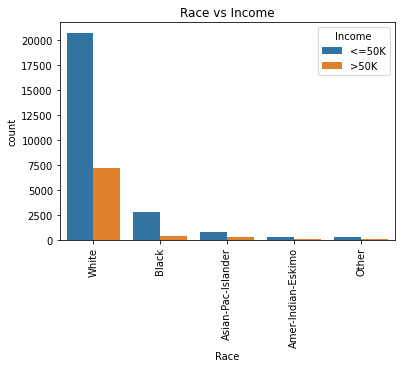

In [ ]:
#Relation between the person's race and income
sns.countplot(dataset['Race'], hue = dataset['Income'])
plt.title("Race vs Income")
plt.xticks(rotation=90)

In [ ]:
#Function for number of working hours range
def hour_group(x):
    x = int(x)
    x = abs(x)
    if( 10 < x < 20 ):
        return "10-20"
    if( 20< x < 30 ):
        return "21-30"
    if( 30 < x < 40 ):
        return "31-40"
    if( 40 < x < 50 ):
        return "41-50"
    if( 50 < x < 60 ):
        return "51-60"
    else:
        return ">60"
dataset['Hour group'] = dataset['Work hours/Week'].apply(hour_group)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

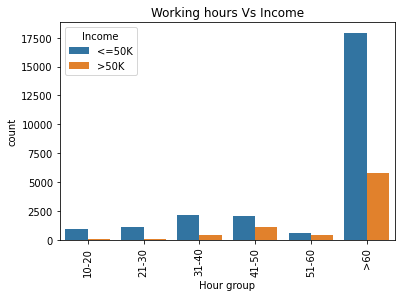

In [ ]:
#Relation with the person's working hour and Income
hour_list = ['10-20', '21-30', '31-40', '41-50', '51-60', '>60']
sns.countplot(dataset['Hour group'], hue = dataset['Income'], order = hour_list )
plt.title("Working hours Vs Income")
plt.xticks(rotation=90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

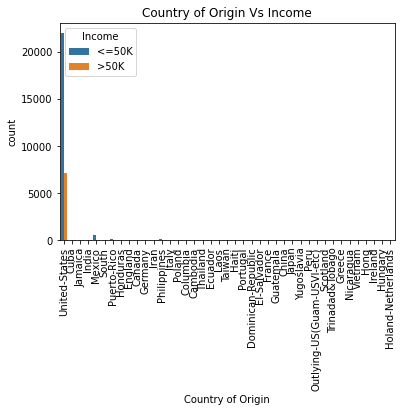

In [ ]:
# Lastly, relation between the country of origin and the person's income
sns.countplot(dataset['Country of Origin'], hue = dataset['Income'])
plt.title("Country of Origin Vs Income")
plt.xticks(rotation=90)


In [ ]:
dataset['Income']=df["Income"].map({'<=50K':0,'>50K':1})

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

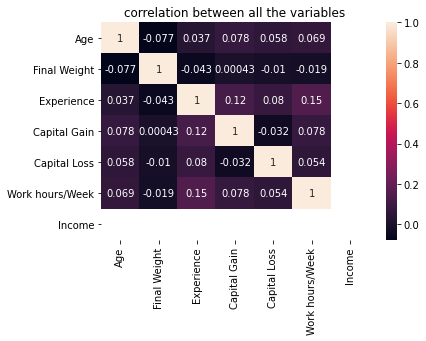

In [ ]:
#heat map for correlation of all the variables
plt.title("correlation between all the variables")
sns.heatmap(dataset.corr(),annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation= 0)